In [403]:
from standard_imports import *
import os 
np.set_printoptions(precision = 15, linewidth=500)

In [348]:
def load_last_npz(directory, file_name):
    base_path = os.path.join(directory,file_name)
    filename = f"{base_path}_{{}}.npz"
    counter = 0
    while os.path.exists(filename.format(counter)):
        counter += 1
    
    counter -= 1
    print(f"Loading {filename.format(counter)}")
    return np.load(filename.format(counter), allow_pickle=True)

In [417]:
d_vec = np.array([1,1,1])
ML = 4

data =load_last_npz(derivative_location(d_vec, ML), "data")

Loading derivatives/ML_4/d_111/data_3.npz


In [418]:
print(data["metadata"])

{'d_vec': array([1, 1, 1]), 'ML': 4, 'n_max': 3, 'cutoffs': array([15137.838783847817 ,  9771.21379097953  ,  6399.185430837646 ,  5219.890876326995 ,  4985.522313532387 ,  4479.668198142913 ,  4209.591113332874 ,  4120.485144316631 ,  3889.9434053597115,  3766.2220864956575,  3710.2415062880186,  3673.294733456795 ,  3554.5378790499954,  3446.9544030791976,  3419.733129432921 ,  3402.0375420679466,  3307.4686104611364,  3263.553271510804 ,  3230.289576458403 ,  3188.2396862280243,  3130.8105573392068]), 'alpha': 0.01}


In [419]:
derivatives = data["dervatives"]

In [420]:
zeta_data = np.load(file_location(d_vec, ML))
    

In [421]:
zeta_data = np.load(file_location(d_vec, ML))
q_2 = zeta_data["q_2"]
zeta = zeta_data["z_d_results"]

q_2_copy = np.copy(q_2)
zeta_copy = np.copy(zeta)
asymptotes = zeta_data["asymptotes"]
zeros = zeta_data["zeros"]


In [422]:
dx = np.diff(q_2_copy, axis = 0)[0]
N1_x = q_2_copy[:-1] + dx/2
N1_y = np.diff(zeta_copy)/dx

dx = np.diff(q_2_copy, axis = 0)[0]
N2_x = q_2_copy[:-2] + dx/2
N2_y = np.diff(N1_y)/dx


dx = np.diff(q_2_copy, axis = 0)[0]
N3_x = q_2_copy[:-3] + dx/2
N3_y = np.diff(N2_y)/dx


(0.0, 100.0)

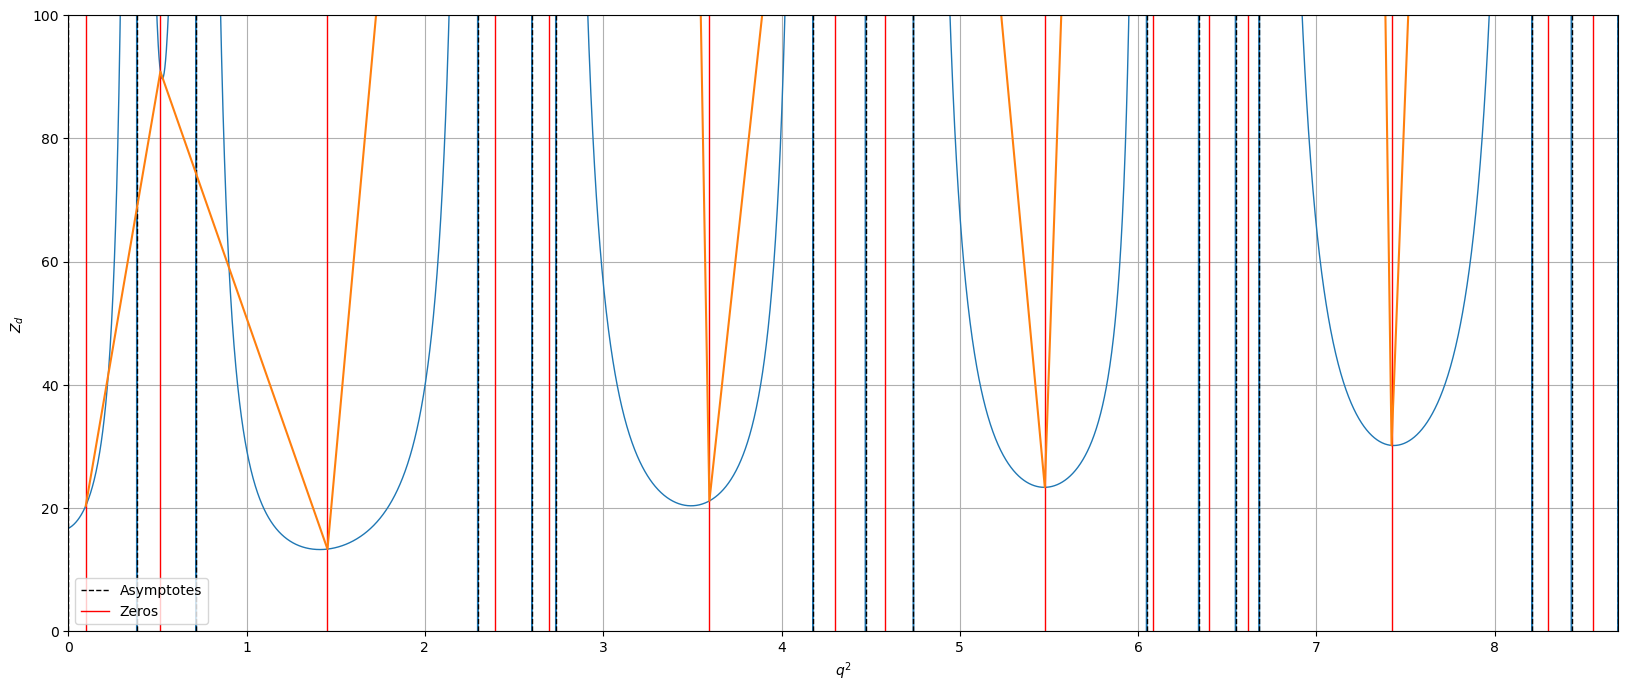

In [423]:
plt.figure(figsize=(20,8))


plot_nice(N1_x, N1_y, asymptotes[0:16], zeros)
plt.plot(zeros,derivatives[:,0] )
plt.ylim(0,100)

In [448]:

print(derivatives[:,1])
print(dx)

[ 6.587052794506667e+01 -2.209637619100131e+02  3.169798496035729e+00 -3.486995249466064e+03  4.544451332414914e+04  1.553212175047687e+01 -1.275737694862933e+03 -1.056580393395900e+03 -3.353512873424529e-02 -2.520674845191229e+04 -1.973761949219217e+04  9.508806949067350e+03 -3.069278871407171e+00 -6.122052044354462e+03 -9.041580259490382e+02  1.888762578790131e+05  8.018154082064855e+01 -3.640576310575952e+02  3.799443602235067e+04 -2.434254247748268e+01 -5.516587996995353e+04]
0.0020629877028726456


[ 0.048935507159955  0.307128513267699  0.984947340419371  1.92360882753383   2.543934565602842  3.144786658873836  3.947046370654645  4.440182303637595  5.029155197704517  5.780166404814212  6.239891199438743  6.506599910755082  7.019174268298054  7.860888474446162  8.42565592632501   8.635481973379001  9.224307114889125  9.996344576823109 10.483949132993324 11.004457132939688 11.763904821759192 12.222513337549136]


(1.45, 1.46)

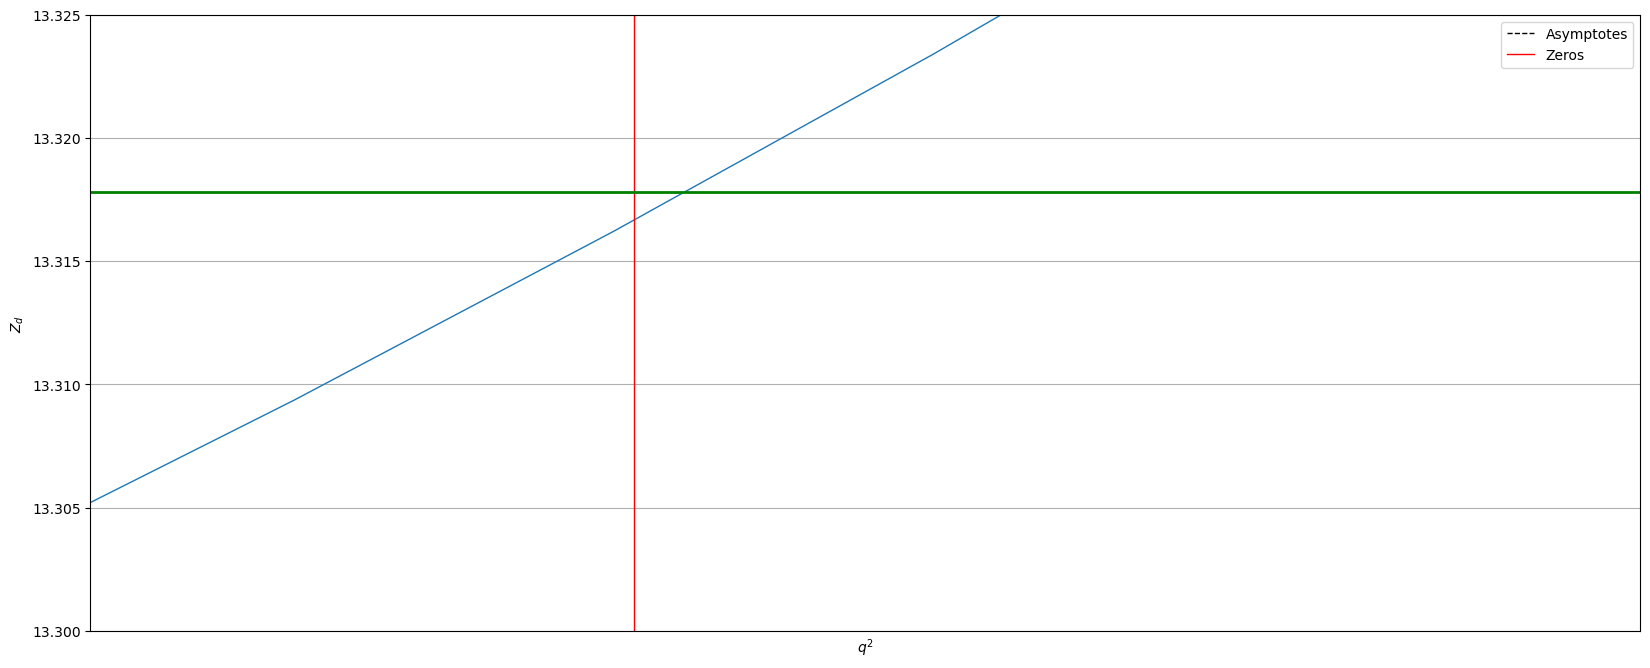

In [446]:
plt.figure(figsize=(20,8))


plot_nice(N1_x, N1_y, asymptotes[0:16], zeros)
plt.plot(zeros,derivatives[:,2] )


hranges = np.append(0,zeros)
min_hranges = hranges[:-1]
max_hranges = hranges[1:]    

hranges = (max_hranges + min_hranges)/2
#hranges = np.append(0,hranges)

hranges = np.append(hranges, zeros[-1])
print(hranges)
max_hranges = hranges[1:]
min_hranges = hranges[:-1]


for i in range(len(derivatives[:,0])):
    plt.hlines(derivatives[i,0], min_hranges[i], max_hranges[i], colors="green",linewidth=2)  
               



               

plt.ylim(13.3,13.325)
plt.xlim(1.45,1.46)



In [312]:
from gab_large_cutoff import g_ab_parallel as g
from tqdm import tqdm

In [313]:
from derivative import Integrals as U

In [314]:
def limiting(a,b, d_vec, x, alpha, cutoff, ML):
    d = np.linalg.norm(d_vec)
    mtilde_sq = (ML/np.pi)**2
    beta = d/np.sqrt(d**2 + 4*x+mtilde_sq)
    gam =1/np.sqrt(1-beta**2)

    return g(a,b,d_vec, x, cutoff, alpha, ML )-gam**(2*b+1)*U(a,b,x,alpha)

In [317]:
a = 1
b = 0
d_vec = np.array([1,0,0])
x = 0
alpha = 0.1
cutoff = 5e4
ML = 4



print(limiting(a,b, d_vec, x, alpha, cutoff, ML))

1.2715542753135176


102.83961939407112


In [331]:
print(g(a,b,d_vec, x, 5e4, 0, ML ))

102.79799135279927


In [319]:
alpha = np.logspace(-1,-4,30)
cutoff = np.logspace(2,5, 30)

A, C = np.meshgrid(alpha, cutoff, indexing='ij')
Z = np.zeros_like(A)
for i in range(len(A)):
    for j in range(len(C)):
        Z[i,j] = limiting(a,b,d_vec, x, A[i,j], C[i,j], ML)



1.2715542753135176


1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753135176
1.2715542753

In [340]:
print(A)

[[0.1        0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1        0.1       ]
 [0.07880463 0.07880463 0.07880463 0.07880463 0.07880463 0.07880463
  0.07880463 0.07880463 0.07880463 0.07880463 0.07880463 0.07880463
  0.07880463 0.07880463 0.07880463 0.07880463 0.07880463 0.07880463
  0.07880463 0.07880463 0.07880463 0.07880463 0.07880463 0.07880463
  0.07880463 0.07880463 0.07880463 0.07880463 0.07880463 0.07880463]
 [0.06210169 0.06210169 0.06210169 0.06210169 0.06210169 0.06210169
  0.06210169 0.06210169 0.06210169 0.06210169 0.06210169 0.06210169
  0.06210169 0.06210169 0.06210169 0.06210169 0.06210169 0.06210169
  0.06210169 0.06210169 0.06210169 0.06210169 0.06210169 0.06210169
  0.06210169 0.06210169 0.06210169 0.06210169 0.06210169 0.06210169]
 [0.0

/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_52888/3037888761.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(102.83955351102952-Z)), extent=extent, origin='lower', aspect='auto')


[]

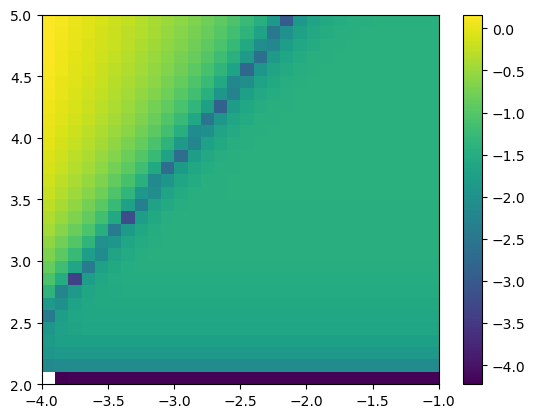

In [338]:
import matplotlib.pyplot as plt

np.min(A), np.max(A)

np.min(C), np.max(C)

extent = (np.log10(np.min(A)), np.log10(np.max(A)), np.log10(np.min(C)), np.log10(np.max(C)))

plt.imshow(np.log10(np.abs(102.83955351102952-Z)), extent=extent, origin='lower', aspect='auto')
plt.colorbar()

plt.plot()

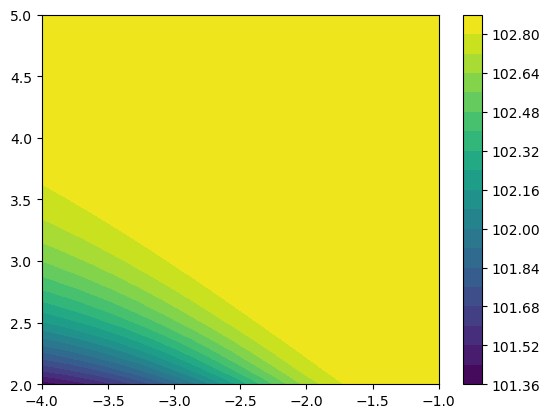

In [344]:
plt.contourf(np.log10(A), np.log10(C), np.abs(Z), levels=20)
plt.colorbar()

In [339]:
print(Z-102.83955351)

[[ 1.02951958e-09  5.95041158e-05  6.54096339e-05  6.58616012e-05
   6.58835362e-05  6.58840674e-05  6.58840711e-05  6.58840711e-05
   6.58840711e-05  6.58840711e-05  6.58840711e-05  6.58840711e-05
   6.58840711e-05  6.58840711e-05  6.58840711e-05  6.58840711e-05
   6.58840711e-05  6.58840711e-05  6.58840711e-05  6.58840711e-05
   6.58840711e-05  6.58840711e-05  6.58840711e-05  6.58840711e-05
   6.58840711e-05  6.58840711e-05  6.58840711e-05  6.58840711e-05
   6.58840711e-05  6.58840711e-05]
 [ 7.49894267e-03  7.77906169e-03  7.82106290e-03  7.82611236e-03
   7.82653361e-03  7.82655343e-03  7.82655379e-03  7.82655379e-03
   7.82655379e-03  7.82655379e-03  7.82655379e-03  7.82655379e-03
   7.82655379e-03  7.82655379e-03  7.82655379e-03  7.82655379e-03
   7.82655379e-03  7.82655379e-03  7.82655379e-03  7.82655379e-03
   7.82655379e-03  7.82655379e-03  7.82655379e-03  7.82655379e-03
   7.82655379e-03  7.82655379e-03  7.82655379e-03  7.82655379e-03
   7.82655379e-03  7.82655379e-03]
 [ 1.2

In [ ]:
d_vec = np.array([1,0,0])


In [350]:
d_vec = np.array([1,1,1])
ML = 4

data =load_last_npz(derivative_location(d_vec, ML), "data")

Loading derivatives/ML_4/d_111/data_2.npz


In [412]:
d_vec = np.array([0,0,0])

In [413]:
zeta_data = np.load(file_location(d_vec, ML))
q_2 = zeta_data["q_2"]
zeta = zeta_data["z_d_results"]

q_2_copy = np.copy(q_2)
zeta_copy = np.copy(zeta)
asymptotes = zeta_data["asymptotes"]
zeros = zeta_data["zeros"]

In [409]:
alpha = np.logspace(-2,-5,6)
cutoff = np.logspace(2,5, 6)

A, C = np.meshgrid(alpha, cutoff, indexing='ij')
Z = np.zeros_like(A)
for i in tqdm(range(len(A))):
    for j in range(len(C)):
        Z[i,j] = derivative(1 ,d_vec, zeros[0], A[i,j], C[i,j], ML)


  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:16<00:00,  2.73s/it]


In [410]:
print(d_vec)

[0 0 0]


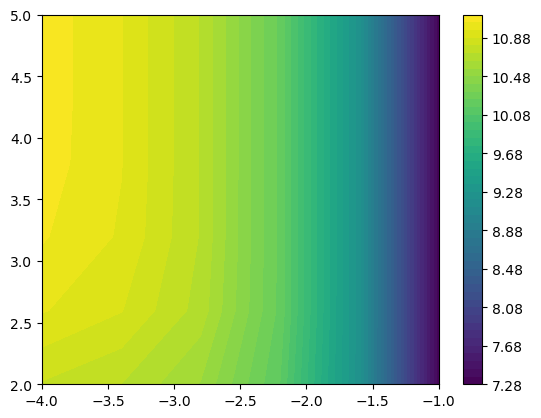

In [411]:
plt.contourf(np.log10(A), np.log10(C), np.abs(Z), levels=60)
plt.colorbar()

In [408]:
print(Z)

[[11.21475077642555  11.214751556841842 11.214751556841843 11.21475155684185  11.21475155684184  11.21475155684184 ]
 [11.210765919080947 11.214751207060468 11.214751558050894 11.21475155805089  11.214751558050892 11.214751558050892]
 [11.155676398307428 11.21282307079406  11.214751377990005 11.2147515583546   11.21475155835459  11.21475155835459 ]
 [11.054223628694237 11.185602792441244 11.213777445930983 11.214751469663467 11.214751558430878 11.214751558430878]
 [10.969969203049706 11.135048788545838 11.20009503767523  11.21426629159732  11.214751513857056 11.214751558450043]
 [10.917855637583045 11.092926113478565 11.174731886629147 11.20742548451123  11.214508165679414 11.214751536102696]]


In [368]:
d_vec = np.array([1,1,1])
ML = 4

data =load_last_npz(derivative_location(d_vec, ML), "data")

for i in data.files():
    print(i)

#list all files in data
    
for i in data.files():
    print(i)
    



#print(data['dervative'])

Loading derivatives/ML_4/d_111/data_2.npz


TypeError: 'list' object is not callable